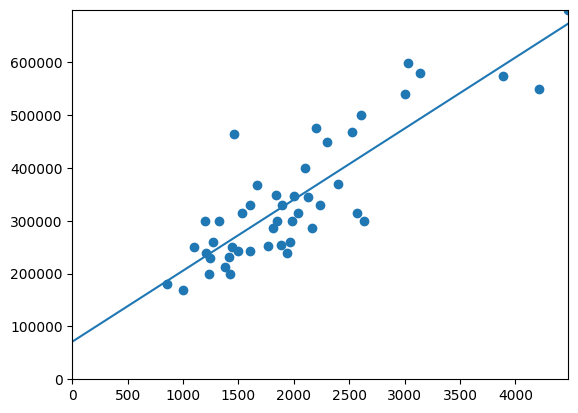

In [1]:
import matplotlib.pyplot as plt
from typing import Dict, List
import pandas as pd

df = pd.read_csv("house-prices.csv")


def regress(predictor: List, response: List) -> Dict[str, float]:
    """Calculate the slope and intercept of a regression line."""
    x_bar = sum(predictor) / len(predictor)
    y_bar = sum(response) / len(response)

    x_diffs = []
    for x in predictor:
        x_diffs.append(x - x_bar)
    oben = sum(x * y - x_bar * y_bar for x, y in zip(predictor, response))
    unten = sum(x**2 for x in x_diffs)
    slope = oben / unten
    intercept = y_bar - slope * x_bar
    return {"slope": slope, "intercept": intercept}


def plot_regression(
    predictor: List, response: List, intercept: float, slope: float
) -> None:
    plt.scatter(predictor, response)
    plt.axline(xy1=(0.0, intercept), slope=slope)
    plt.ylim(0, max(response))
    plt.xlim(0, max(predictor))
    plt.show()


res = regress(predictor=df["sq-foot"].to_list(), response=df["price"].to_list())

plot_regression(
    predictor=df["sq-foot"].to_list(),
    response=df["price"].to_list(),
    intercept=res["intercept"],
    slope=res["slope"],
)